<a href="https://colab.research.google.com/github/angelaomo/Heart_Disease_Prediction/blob/main/HEART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [5]:
# import and read file
df = pd.read_csv(r'/content/heart.csv')
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


## **Data Description**
#### **The features in the dataset and meaning:**

age - age in years,

sex - (1 = male; 0 = female),

cp - chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic),

trestbps - resting blood pressure (in mm Hg on admission to the hospital),

chol - serum cholestoral in mg/dl,

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),

restecg - resting electrocardiographic results,

thalach - maximum heart rate achieved,

exang - exercise induced angina (1 = yes; 0 = no),

oldpeak - ST depression induced by exercise relative to rest,

slope - the slope of the peak exercise ST segment,

ca - number of major vessels (0-3) colored by flourosopy,

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect,

target - have disease or not (1=yes, 0=no).


**Three different models will be used**

KNeighborsClassifier

DecisionTreeClassifier

RandomForestClassifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#**DATA EXPLORATION AND DATA CLEANING**

In [7]:
# Check for missing values
print("\nMissing values in the data:")
print(df.isnull().sum())


Missing values in the data:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# Remove duplicate rows
print("\nNumber of duplicate rows before removal:")
print(df.duplicated().sum())


Number of duplicate rows before removal:
1


In [9]:
df = df.drop_duplicates()
print("Number of duplicate rows after removal:")
print(df.duplicated().sum())

Number of duplicate rows after removal:
0


In [10]:
# Get summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.5260

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

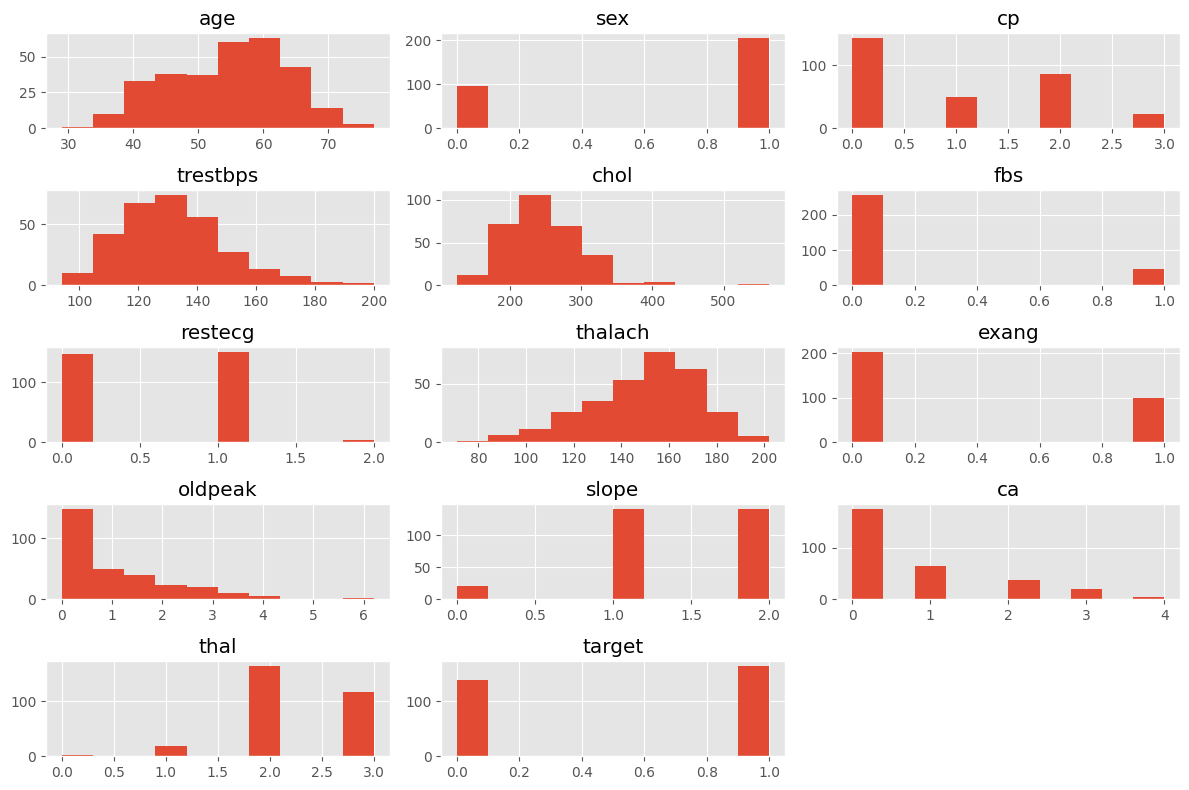

In [12]:
#UNIVARIATE

# Plot histograms for all features
plt.figure(figsize=(12, 8))
num_cols = df.shape[1]
num_rows = (num_cols + 2) // 3
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 3, i + 1)
    plt.title(col)
    df[col].hist()
plt.tight_layout()
plt.show()

<Axes: xlabel='target', ylabel='count'>

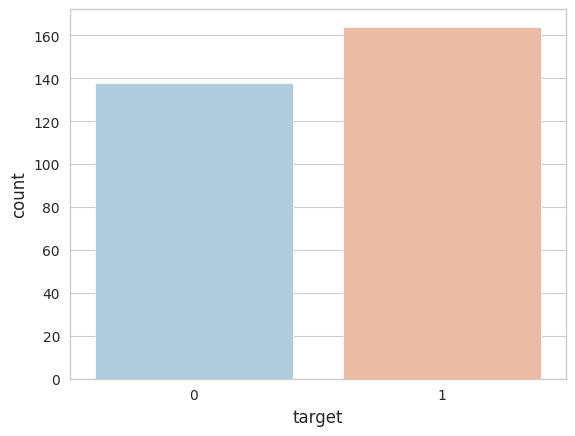

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [14]:
sex_age = df.groupby(['sex'])['age'].mean().astype(int)
sex_age

sex
0    55
1    53
Name: age, dtype: int64

#**MULTIVARIATE ANALYSIS**

In [15]:
df['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

In [16]:
# cp vs sex

def cp_cat(x):
  if x == 0:
    result = 'typical angina'
  elif x == 1:
    result = 'atypical angina'
  elif x == 2:
    result = 'non-anginal pain'
  else:
    result = 'asymptomatic'

  return result

df['cp'] = df['cp'].apply(cp_cat)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,non-anginal pain,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,atypical angina,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,atypical angina,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,typical angina,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# sex, age, and cp
sex_cp_age = df.groupby(['sex', 'cp'])['age'].mean().astype(int).unstack('sex')
sex_cp_age

sex,0,1
cp,,
asymptomatic,63,54
atypical angina,51,51
non-anginal pain,54,52
typical angina,57,55


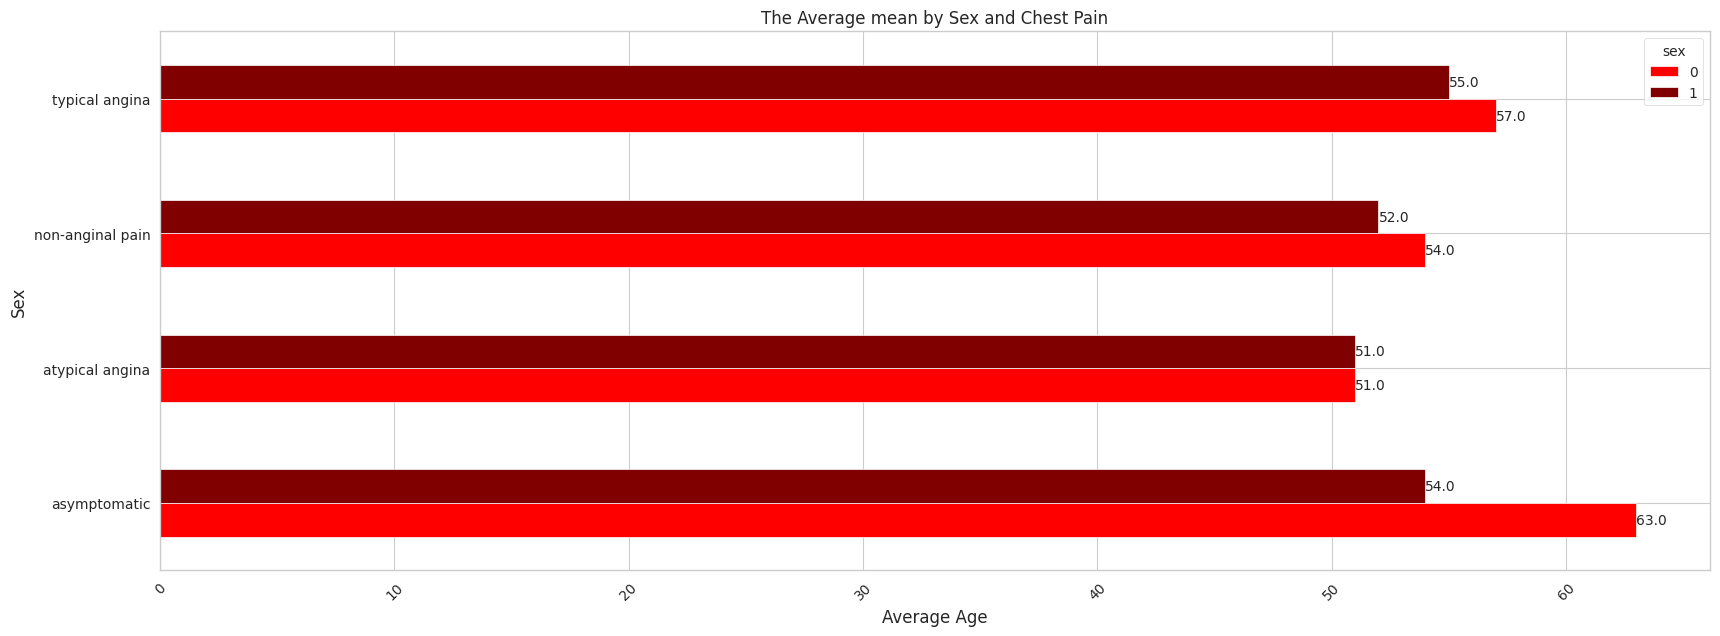

In [18]:
# plot a pivot table
colors = ['#FF0000', '#800000']
ax = sex_cp_age.plot.barh(figsize = (20, 7), color = colors)
plt.ticklabel_format(style ='plain', axis = 'x')
# Set the title and labels
plt.title('The Average mean by Sex and Chest Pain', fontsize = 12)
plt.xlabel('Average Age')
plt.ylabel('Sex')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.1f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

In [19]:
# create a function that categorises patient age

def age_bracket(x):
  if x <= 39:
    return 'Youth(29-39)'

  elif x <= 50:
    return 'Old Adult(40-50)'

  elif x <= 72:
    return 'Elders(62-72)'

  else:
    return 'Aged(>72)'

# create a new column for age category
df['age_category'] = df['age'].apply(age_bracket)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category
0,63,1,asymptomatic,145,233,1,0,150,0,2.3,0,0,1,1,Elders(62-72)
1,37,1,non-anginal pain,130,250,0,1,187,0,3.5,0,0,2,1,Youth(29-39)
2,41,0,atypical angina,130,204,0,0,172,0,1.4,2,0,2,1,Old Adult(40-50)
3,56,1,atypical angina,120,236,0,1,178,0,0.8,2,0,2,1,Elders(62-72)
4,57,0,typical angina,120,354,0,1,163,1,0.6,2,0,2,1,Elders(62-72)


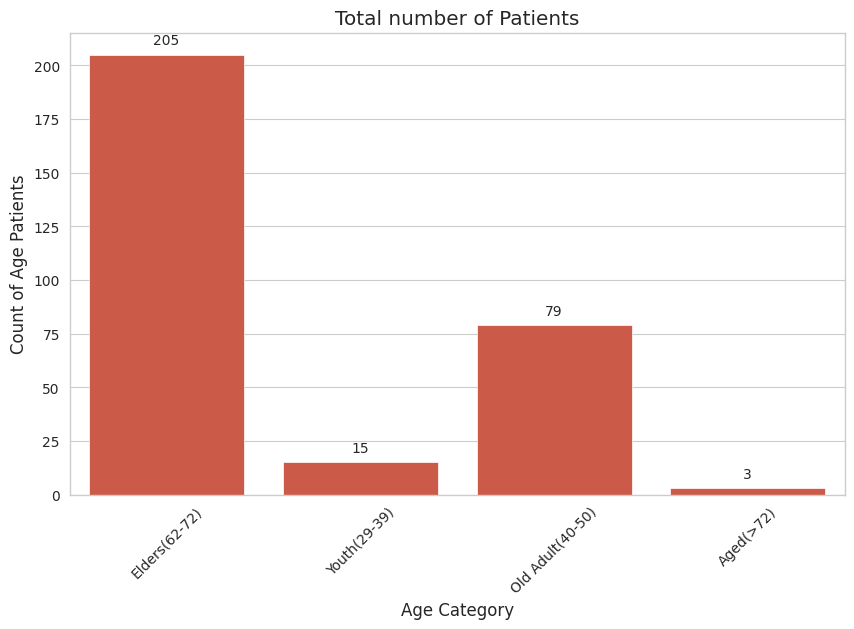

In [20]:
# Visualize patient group with data labels and rotated x-axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='age_category', data=df)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Total number of Patients')
plt.xlabel('Age Category')
plt.ylabel('Count of Age Patients')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()


In [21]:
# Age Category as againts Cholesterol
age_chols = df.groupby(['age_category'])['chol'].mean().round(2).sort_values(ascending = False)
age_chols

age_category
Aged(>72)           256.67
Elders(62-72)       252.79
Old Adult(40-50)    235.06
Youth(29-39)        218.73
Name: chol, dtype: float64

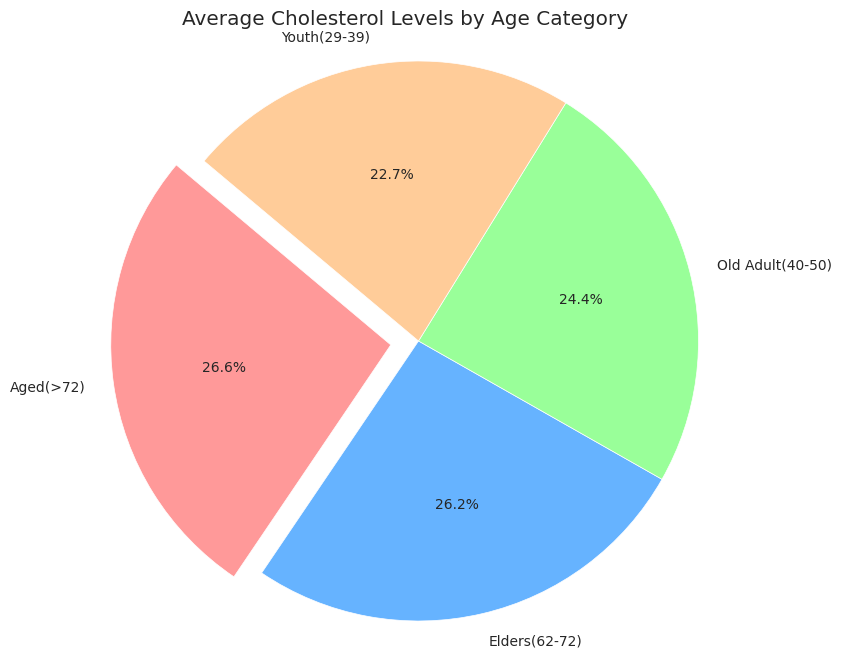

In [22]:
# Customized Pie Chart for Age Category against Cholesterol
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Define custom colors for the pie chart
explode = (0.1, 0, 0, 0)  # Specify the "explode" parameter to highlight a specific slice

plt.pie(age_chols, labels=age_chols.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Average Cholesterol Levels by Age Category')

plt.show()


In [23]:
df['thal'].unique()

array([1, 2, 3, 0])

In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_category'],
      dtype='object')

In [25]:
# Distribution of Thallasemia Category
count_thall = df['thal'].value_counts().sort_values(ascending = True)
count_thall

thal
0      2
1     18
3    117
2    165
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Thallasemia')

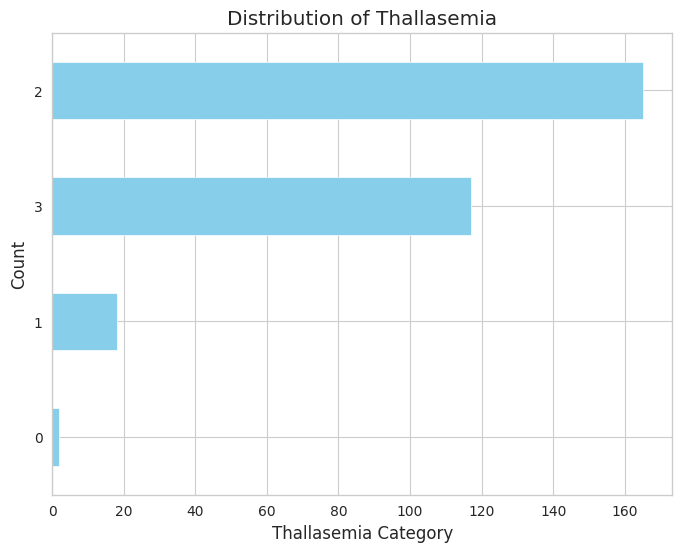

In [26]:
# view using bar chart
plt.figure(figsize = (8, 6))
count_thall.plot(kind = 'barh', color = 'skyblue')
plt.xlabel('Thallasemia Category')
plt.ylabel('Count')
plt.title('Distribution of Thallasemia')

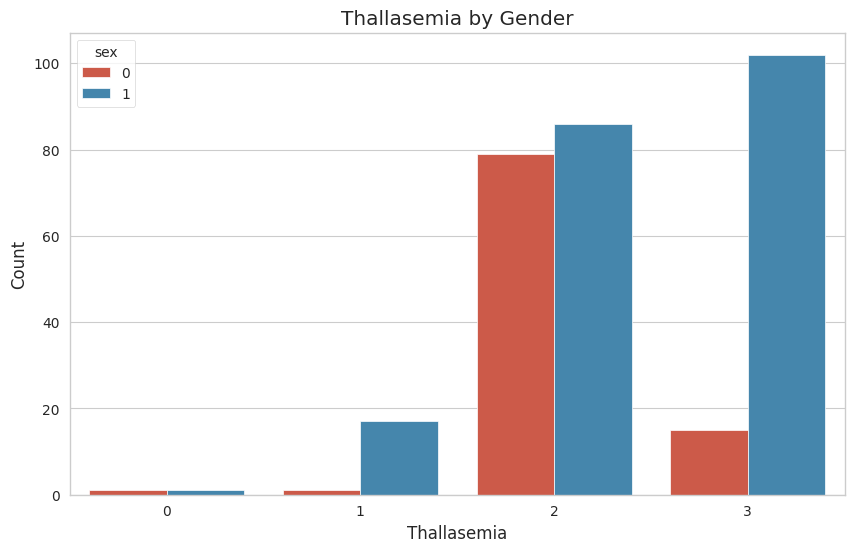

In [27]:
# Gender vs Thalassemia category
plt.figure(figsize = (10, 6))
sns.countplot(x = df['thal'], data=df, hue = df['sex'])
plt.xlabel('Thallasemia')
plt.ylabel('Count')
plt.title('Thallasemia by Gender')
plt.show()

In [28]:
# fetch all the numerical columns
num_cols = df.select_dtypes(include = ['float', 'int']).columns.tolist()
num_cols

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

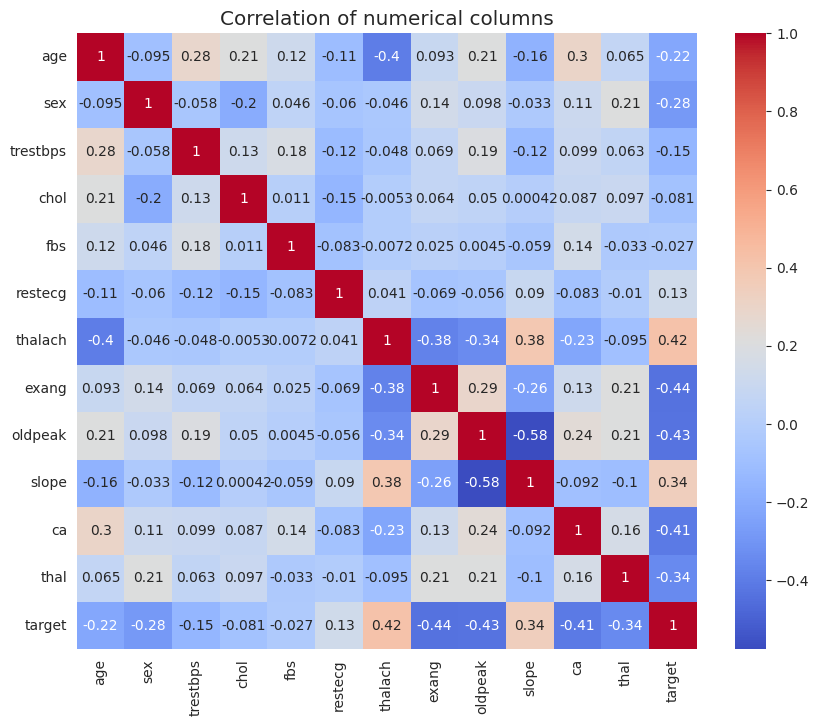

In [29]:
# The relationship between numerical columns
corr = df[num_cols].corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation of numerical columns')
plt.show()

#**FEATURES SELECTION**

In [30]:


# Select the target variable
y = df['target']

# Select the independent variables
X = df.drop('target', axis=1)

# Print the first few rows of the target variable
print("Target Variable (y):")
print(y.head(2))



Target Variable (y):
0    1
1    1
Name: target, dtype: int64


In [31]:
# Print the column names of the independent variables
print("\nIndependent Variables (X):")
print(X.columns)


Independent Variables (X):
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'age_category'],
      dtype='object')


In [32]:
# drop the age category
X.drop('age_category', axis = 1, inplace = True)
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,asymptomatic,145,233,1,0,150,0,2.3,0,0,1
1,37,1,non-anginal pain,130,250,0,1,187,0,3.5,0,0,2


## **Convert Categorical Columns to Numerical**
- One Hot Encoder from scikit-learn.

In [33]:
from sklearn.preprocessing import OneHotEncoder
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_X = encoder.fit_transform(X)

In [34]:
 #Train_Test_Split using 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.3, random_state=42)

In [35]:
#Data Scaling
#It is important to scale the features of our dataset, especially when using algorithms like `logistic regression`, `support vector machine`, and `K-Nearest Neighbour`.
# We will use standard scaler from scikit-learn to scale our dataset.
from sklearn.preprocessing import StandardScaler
from scipy import sparse

# Assuming X_train and X_test are sparse matrices
scaler = StandardScaler(with_mean=False)  # Specify with_mean=False for sparse matrices

# Fit and transform on training and testing set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection
- Logistic Regression
- Random Forest
- Decision Tree

In [36]:
# import the algorithms for model building and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## **LOGISTIC REGRESSION**

In [37]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:,1]

In [38]:
from sklearn.metrics import accuracy_score
# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for LR
print(f'The accuracy score of the LR is {accuracy_score(y_pred, y_test).round(3)}')

The accuracy score of the LR is 0.659


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
  '''To calculate and return a dictionary of performance metrics'''

  # calculate performance metrics
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)

  # create a dictionary of results
  results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1_Score': f1}

  return results

In [40]:
lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
print(f"{lr_result}")

{'Model': 'lr_model', 'Accuracy': 0.6593406593406593, 'Precision': 0.6875, 'Recall': 0.673469387755102, 'F1_Score': 0.6804123711340205}


#DECISION TREE

In [41]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:,1]

In [42]:
from sklearn.metrics import accuracy_score
# create predictions
y_pred = dt_model.predict(X_test_scaled)

# print accuracy score for DT
print(f'The accuracy score of the DT is {accuracy_score(y_pred, y_test).round(3)}')

The accuracy score of the DT is 0.769


In [43]:
# metric results for DT
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
print(f"{dt_result}")

{'Model': 'dt_model', 'Accuracy': 0.7692307692307693, 'Precision': 0.78, 'Recall': 0.7959183673469388, 'F1_Score': 0.7878787878787878}


#RANDOM FOREST

In [44]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_probs = rf_model.predict_proba(X_test_scaled)[:,1]

In [45]:
from sklearn.metrics import accuracy_score
# create predictions
y_pred = rf_model.predict(X_test_scaled)

# print accuracy score for RF
print(f'The accuracy score of the RF is {accuracy_score(y_pred, y_test).round(3)}')

The accuracy score of the RF is 0.846


In [46]:
# metric results for RF
rf_result = metrics_calculator(y_test, y_pred, 'rf_model')
print(f"{rf_result}")

{'Model': 'rf_model', 'Accuracy': 0.8461538461538461, 'Precision': 0.8723404255319149, 'Recall': 0.8367346938775511, 'F1_Score': 0.8541666666666667}


# Model Evaluation
- Evaluate the models using classification reports and confusion matrices.

LOGISTIC REGRESSION Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.63      0.64      0.64        42
   Heart Disease       0.69      0.67      0.68        49

        accuracy                           0.66        91
       macro avg       0.66      0.66      0.66        91
    weighted avg       0.66      0.66      0.66        91



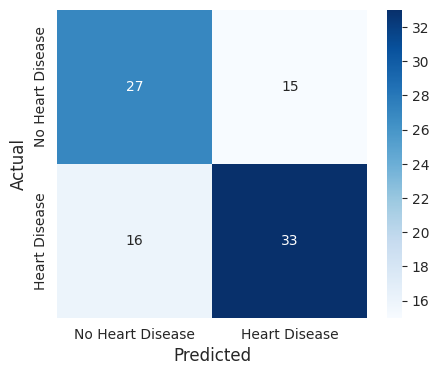

DECISION TREE Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.76      0.74      0.75        42
   Heart Disease       0.78      0.80      0.79        49

        accuracy                           0.77        91
       macro avg       0.77      0.77      0.77        91
    weighted avg       0.77      0.77      0.77        91



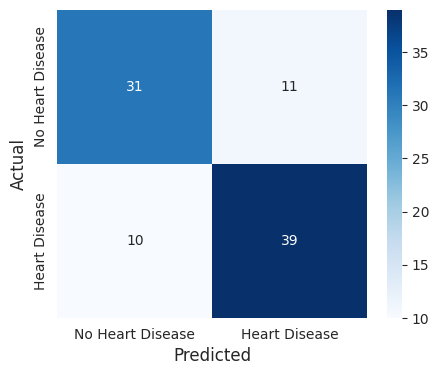

RANDOM FOREST Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.82      0.86      0.84        42
   Heart Disease       0.87      0.84      0.85        49

        accuracy                           0.85        91
       macro avg       0.85      0.85      0.85        91
    weighted avg       0.85      0.85      0.85        91



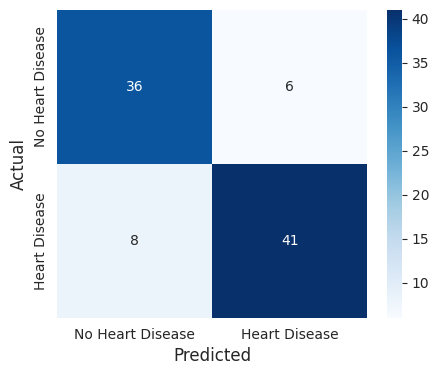

In [47]:
from sklearn.metrics import confusion_matrix

# Create a list of model names
model_names = ['LOGISTIC REGRESSION', 'DECISION TREE', 'RANDOM FOREST']
models = [lr_model, dt_model, rf_model]

# Set the labels for the confusion matrix
labels = ['No Heart Disease', 'Heart Disease']

# Set the desired number of decimals
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for i, model in enumerate(models):
  # predict the classes of the testing data
  y_pred = model.predict(X_test_scaled)

  # generate the classification report
  report = classification_report(y_test, y_pred, target_names = labels)
  print(f'{model_names[i]} Classification Report:\n{report}')

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  # Create a heatmap to visualize the confusion matrix
  plt.figure(figsize = (5, 4))
  sns.heatmap(cm, annot = True, fmt='d', cmap='Blues', xticklabels = labels, yticklabels =labels)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [48]:
# Concatenate results into a single dataframe for all the model metric calculator results
result_df = pd.DataFrame([lr_result, dt_result, rf_result])
result_df

,Model,Accuracy,Precision,Recall,F1_Score
0,lr_model,0.659341,0.68750,0.673469,0.680412
1,dt_model,0.769231,0.78000,0.795918,0.787879
2,rf_model,0.846154,0.87234,0.836735,0.854167


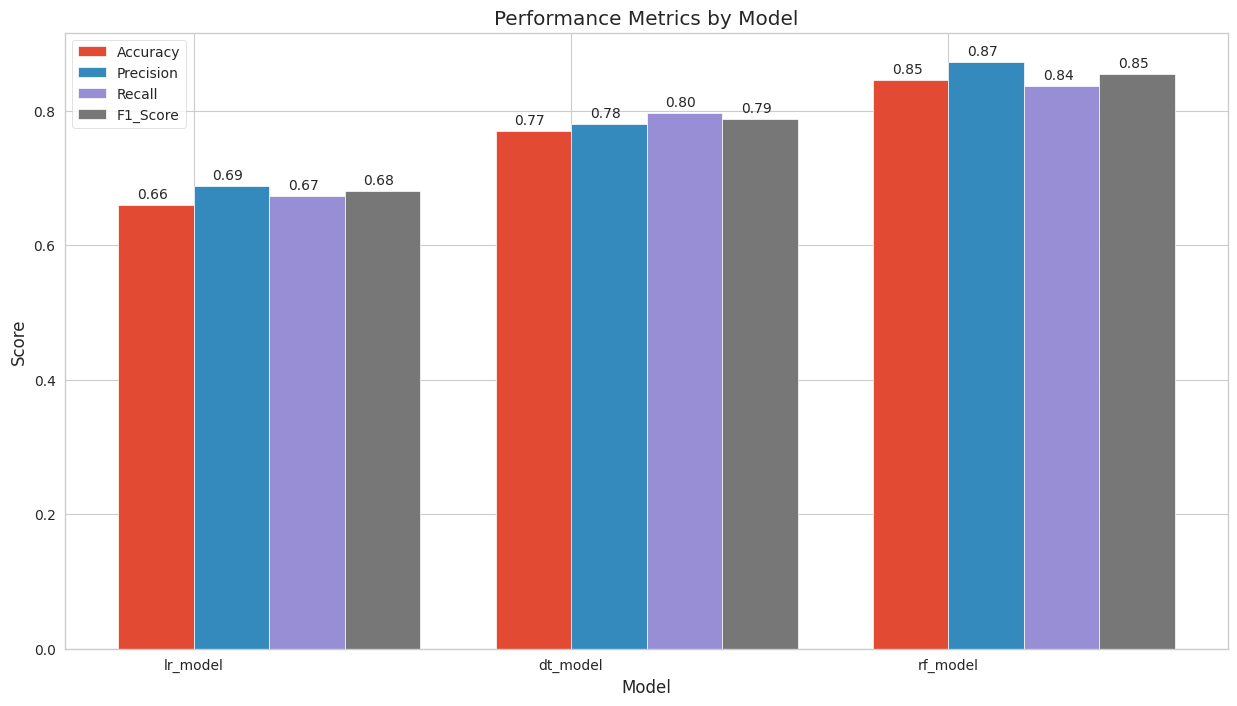

In [49]:
# View the model metric scores in a bar chart
plt.figure(figsize = (15, 8))
# set the width of the bar
bar_width = 0.2
# create a bar chart of the metrics for each model
models = result_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']

for i, metric in enumerate(metrics):
  plt.bar(np.arange(len(models)) + i*bar_width, result_df[metric], width=bar_width, label=metric)
  for j, value in enumerate(result_df[metric]):
    plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models))+ bar_width/2, models)
plt.legend()
plt.show()

*It is seen that Random Forest provides the balance measure between correctly identifying heart disease cases(recall) with a percentage of 88%, and minimizing false positives(precision) with a percentage of 83%. It also has a higher accuracy of 84% for prediction of heart disease cases.*